In [0]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn.datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline

In [0]:
#train = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/test.csv")

In [3]:
train = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/20192/digit-recognizer/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# Free some space
del train

# Normalize the data
X_train = np.array(X_train) / 255.0
# One-hot coding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

Using TensorFlow backend.


In [0]:
# Transpose X, Y
X_train = np.array(X_train.T)
Y_train = np.array(Y_train.T)
X_val = np.array(X_val.T)
Y_val = np.array(Y_val.T)

In [5]:
# Check shape of X, Y
print ("X_train.shape = " + str(X_train.shape)
        + "\nY_train.shape = " + str(Y_train.shape))
print ("X_val.shape = " + str(X_val.shape)
        + "\nY_val.shape = " + str(Y_val.shape))

X_train.shape = (784, 37800)
Y_train.shape = (10, 37800)
X_val.shape = (784, 4200)
Y_val.shape = (10, 4200)


In [6]:
n_x = X_train.shape[0] #number of input layer
n_h = 20 #number of nodes in hidden layer
n_y = Y_train.shape[0] #number of output layer
print("number of nodes input layer: %d" %n_x)
print("number of nodes hidden layer: %d" %n_h)
print("number of outputs layer: %d" %n_y)

number of nodes input layer: 784
number of nodes hidden layer: 20
number of outputs layer: 10


In [0]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1" : W1,
                  "b1" : b1,
                  "W2" : W2,
                  "b2" : b2}
                    
    return parameters

In [0]:
def theta(Z):
    T = np.exp(Z) / np.sum(np.exp(Z), axis = 0)
    return T

In [0]:
def relu(Z):
    R = np.maximum(0, Z)
    return R

In [0]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = theta(Z2)

    cache = {"A1" : A1,
             "Z1" : Z1,
             "A2" : A2,
             "Z2" : Z2}
    return A2, cache

In [0]:
def compute_cost(A2, Y):
    m = Y.shape[1] #number of training examples
    loss = - np.sum(np.multiply(Y, np.log(A2)))
    cost = loss / m
    cost = np.squeeze(cost)  
    return cost

In [0]:
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]


    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.squeeze(np.sum(dZ2, keepdims=True))

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0 ] = 0
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.squeeze(np.sum(dZ1, keepdims=True))
    
    grads = {"dW2" : dW2,
             "db2" : db2,
             "dW1" : dW1,
             "db1" : db1}
            
    return grads

In [0]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1" : W1,
                  "b1" : b1,
                  "W2" : W2,
                  "b2" : b2}

    return parameters

In [0]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    m = X.shape[1]
    mini_batches = []
    np.random.seed(seed)

    # Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))

    num_complete_minibatches = math.floor(m / mini_batch_size) 

    #Partition 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size:
                                  (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size:(k+1)
                                    * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % mini_batch_size !=0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:, num_complete_minibatches
                                    * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches
                                    * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [0]:
def sm_model2(X, Y, num_epochs = 3000, learning_rate = 0.5, mini_batch_size = 64, print_cost = False):
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]

  seed = 10
  m = X.shape[1]
  costs = []

  for i in range(num_epochs):
    seed = seed + 1
    minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
    cost_total = 0

    for minibatch in minibatches:
      #Select a minibatch
      (minibatch_X, minibatch_Y) = minibatch

      #foward propagation
      A2, cache = forward_propagation(minibatch_X, parameters)

      cost_total += compute_cost(A2, minibatch_Y)

      grads = backward_propagation(minibatch_X, minibatch_Y, parameters, cache)
      #update parameter
      parameters = update_parameters(parameters, grads, learning_rate)

    cost_avg = cost_total / len(minibatches)
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" % (i, cost_avg))
    if print_cost and i % 100 == 0:
      costs.append(cost_avg)

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('epochs (per 100)')
  plt.title("Learning rate = " + str(learning_rate))
  plt.show()
  return parameters

In [0]:
def predict(parameters, X):
  A, cache = forward_propagation(X, parameters)
  predictions = np.round(A)
  return predictions

Cost after iteration 0: 1.740751
Cost after iteration 100: 0.078840
Cost after iteration 200: 0.045008
Cost after iteration 300: 0.028117
Cost after iteration 400: 0.017967
Cost after iteration 500: 0.011914
Cost after iteration 600: 0.008098
Cost after iteration 700: 0.005836
Cost after iteration 800: 0.004445
Cost after iteration 900: 0.003558
Cost after iteration 1000: 0.002943
Cost after iteration 1100: 0.002477
Cost after iteration 1200: 0.002115
Cost after iteration 1300: 0.001860
Cost after iteration 1400: 0.001646
Cost after iteration 1500: 0.001472
Cost after iteration 1600: 0.001323
Cost after iteration 1700: 0.001202
Cost after iteration 1800: 0.001101
Cost after iteration 1900: 0.001015
Cost after iteration 2000: 0.000938
Cost after iteration 2100: 0.000872
Cost after iteration 2200: 0.000814
Cost after iteration 2300: 0.000765
Cost after iteration 2400: 0.000714


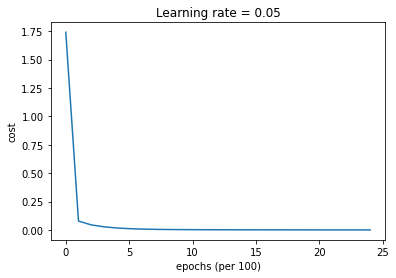

In [18]:
parameters_model = sm_model2(X_train, Y_train, num_epochs=2500, learning_rate=0.05, mini_batch_size=128, print_cost=True)

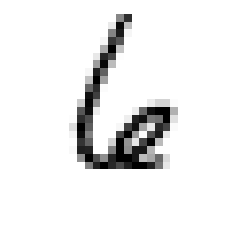

6
6


In [21]:
Y_hat = predict(parameters_model, X_val)

# Print image
image_id = 188
plt.imshow(X_val[:, image_id].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

# Prediction
Y_hat_label = np.argmax(Y_hat, axis=0)
print(Y_hat_label[image_id])

# True label
Y_val_label = np.argmax(Y_val, axis=0)
print(Y_val_label[image_id])

In [22]:
score = 100*accuracy_score(Y_val_label, Y_hat_label)
print("Model accuracy score: %0.2f" %score)

Model accuracy score: 94.64


In [0]:
#Submission on Kaggle
X_test = np.array(test.T)/255

results = predict(parameters_model, X_test)
results = np.argmax(results, axis=0)
results = pd.Series(results, name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("/content/drive/My Drive/20192/digit-recognizer/softmax_one_hidden_final.csv",index=False)